# Notebook

## Hal yang Dilakukan
Di notebook ini, saya melakukan serangkaian kegiatan untuk menganalisis dan mengolah data yang ada. Mulai dari mengecek keberadaan data, membersihkan data yang nilainya tidak jelas atau tidak ada, sampai memvisualisasikan data sementara sebelum membuat dashboard interaktif di Tableau.

## Hal yang Dihasilkan
Melalui notebook ini, saya akan menghasilkan data yang sudah bersih dan tidak acak lagi (**raw data**) guna membuat dashboard menjadi lebih baik dan memanjakan mata awwuuwwooo.

In [ ]:
# Data Collection

import pandas as jokowi

path = 'dataset/online-retail.csv'

print(f"Baca file: {path} ...")

df = jokowi.read_csv(path, encoding='ISO-8859-1')

print("berhasil")
print(f"Data: {df.shape[0]} baris, {df.shape[1]} kolom")
df.head()

Baca file: dataset/online-retail.csv ...
berhasil
Data: 541909 baris, 8 kolom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Analisis Hasil

Dalam proyek ini, saya menggunakan dataset transaksi ritel daring berskala besar yang terdiri dari 541.909 baris data untuk menganalisis pola perilaku konsumen secara mendalam. Dataset ini memuat delapan variabel kunci, termasuk InvoiceDate yang saya manfaatkan untuk mengukur aspek Recency, CustomerID untuk mengidentifikasi Frequency belanja pelanggan unik, serta kombinasi Quantity dan UnitPrice untuk menghitung nilai Monetary. Struktur data yang komprehensif ini menjadi landasan utama bagi saya dalam melakukan segmentasi pelanggan (RFM Analysis) dan menggali wawasan bisnis dari aktivitas penjualan yang didominasi oleh pasar Inggris (United Kingdom) namun tetap mencakup transaksi internasional.

In [ ]:
# Cleaning data

import pandas as jokowi

print("Cleaning...")

df_clean = df.copy()

df_clean = df_clean.dropna(subset=['CustomerID'])

df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

df_clean['InvoiceDate'] = jokowi.to_datetime(df_clean['InvoiceDate'])

df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

print("cleaning selesai")
print(f"data tersisa: {df_clean.shape[0]} baris")
df_clean.head()

Cleaning...
cleaning selesai
data tersisa: 397884 baris


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### Analisis

Dalam tahap persiapan data ini, saya melakukan serangkaian proses pembersihan untuk memastikan kualitas analisis RFM yang akurat dan relevan. Fokus utama saya adalah mengeliminasi transaksi yang tidak memiliki informasi CustomerID, karena analisis segmentasi pelanggan mustahil dilakukan tanpa mengetahui identitas unik dari setiap pembeli. Selain itu, saya juga membersihkan data dari gangguan teknis (noise) seperti transaksi dengan jumlah barang negatif yang mengindikasikan retur, serta harga yang tidak valid, agar perhitungan nilai moneter mencerminkan pendapatan riil perusahaan. Saya juga telah melakukan penyesuaian tipe data, khususnya pada format tanggal dan kode pelanggan, untuk memfasilitasi operasi matematika di tahap selanjutnya. Meskipun proses filtrasi ini menyusutkan volume data menjadi 397.884 baris, himpunan data yang tersisa kini memiliki integritas tinggi dan siap digunakan untuk memetakan perilaku pelanggan secara presisi.

In [5]:
tanggal_awal = df_clean['InvoiceDate'].min()
tanggal_akhir = df_clean['InvoiceDate'].max()

print(f"Data paling awal: {tanggal_awal}")
print(f"Data terakhir: {tanggal_akhir}")

durasi = tanggal_akhir - tanggal_awal
print(f"\nPeriode: {durasi.days} hari")

Data paling awal: 2010-12-01 08:26:00
Data terakhir: 2011-12-09 12:50:00

Periode: 373 hari


### Verifikasi
Melalui pemeriksaan rentang waktu data, saya memverifikasi bahwa aktivitas transaksi dalam dataset ini berlangsung selama 373 hari, dimulai dari 1 Desember 2010 hingga berakhir pada 9 Desember 2011. Temuan ini mengonfirmasi bahwa dataset ini merupakan rekam jejak historis, yang sekaligus memvalidasi keputusan teknis saya untuk menetapkan tanggal simulasi analisis (snapshot date) pada Desember 2011 dan tidak menggunakan menggunakan tanggal hari ini.

In [8]:
import datetime as bahlil

# snapshot = Data terakhir + 1 hari = 09 Desember 2011 + 1 Hari = 10 Desember 2011
snapshot_date = df_clean['InvoiceDate'].max() + bahlil.timedelta(days=1)

print(f"Analisis ini disimulasikan pada tanggal: {snapshot_date.date()}")

# Grouping per CustomerID
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency: Jarak hari belanja terakhir
    'InvoiceNo': 'nunique',  # Frequency: Jumlah struk unik
    'TotalPrice': 'sum',     # Monetary: Total uang yang dibelanjakan
    'Country': 'first'       # Country: Ambil data negara
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

print(f"Jumlah Pelanggan Unik: {rfm.shape[0]}")
print("\nHasil RFM:")
rfm.head()

Analisis ini disimulasikan pada tanggal: 2011-12-10
Jumlah Pelanggan Unik: 4338

Hasil RFM:


,Recency,Frequency,Monetary,Country
CustomerID,,,,
12346,326,1,77183.60,United Kingdom
12347,2,7,4310.00,Iceland
12348,75,4,1797.24,Finland
12349,19,1,1757.55,Italy
12350,310,1,334.40,Norway


### Analisis Hasil
Melalui code ini, saya telah berhasil mengubah ratusan ribu baris data transaksi mentah menjadi tabel RFM yang jauh lebih ringkas dan strategis, dengan simulasi analisis yang ditetapkan pada tanggal 10 Desember 2011. Hasil agregasi ini segera memperlihatkan pola perilaku yang kontras antar pelanggan; misalnya, saya mendapati pelanggan dengan ID 12346 yang memiliki nilai belanja (Monetary) sangat fantastis sebesar 77.183,60, namun ia memiliki risiko churn yang tinggi karena sudah tidak berbelanja selama 326 hari. Sebaliknya, saya juga melihat profil pelanggan loyal seperti ID 12347 yang mencatatkan frekuensi belanja tujuh kali dengan Recency yang sangat segar, yaitu baru dua hari yang lalu. Tabel ini menjadi bukti bahwa saya tidak lagi melihat data sebagai deretan struk belanja, melainkan sebagai profil unik dari setiap individu yang siap untuk disegmentasi.

In [11]:
print("RFM Stats")
print(rfm.describe())

print("\nUnexpected Data")
cek_error = rfm[(rfm['Monetary'] <= 0) | (rfm['Frequency'] <= 0)]
print(f"Jumlah data yang tidak jelas: {cek_error.shape[0]}")

print("\nTop Monetary Customers:")
print(rfm.sort_values('Monetary', ascending=False).head(5))

RFM Stats
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2054.266460
std     100.014169     7.697998    8989.230441
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     307.415000
50%      51.000000     2.000000     674.485000
75%     142.000000     5.000000    1661.740000
max     374.000000   209.000000  280206.020000

Unexpected Data
Jumlah data yang tidak jelas: 0

Top Monetary Customers:
            Recency  Frequency   Monetary         Country
CustomerID                                               
14646             2         73  280206.02     Netherlands
18102             1         60  259657.30  United Kingdom
17450             8         46  194550.79  United Kingdom
16446             1          2  168472.50  United Kingdom
14911             1        201  143825.06            EIRE


### Analisis
Dalam fase eksplorasi statistik terhadap 4.338 profil pelanggan ini, saya telah memvalidasi integritas data dengan memastikan tidak adanya anomali tersisa, yang dibuktikan oleh nihilnya baris data error pada pengecekan variabel. Temuan paling signifikan yang saya dapatkan adalah adanya ketimpangan distribusi nilai belanja yang sangat ekstrem, di mana nilai rata-rata (mean) sebesar 2.054,27 terpaut jauh di atas nilai tengah (median) yang hanya 674,48. Disparitas ini terkonfirmasi saat saya menelusuri daftar pelanggan teratas, di mana saya menemukan pelanggan dengan ID 14646 asal Belanda yang mencatatkan total transaksi fantastis hingga 280.206,02, sebuah angka yang sangat kontras dibandingkan mayoritas pelanggan lainnya sehingga menuntut saya untuk melakukan segmentasi berbasis peringkat (scoring) agar analisis tidak bias oleh segelintir pelanggan elit tersebut.

In [13]:
# Buat label kesenjangan skor RFM

r_labels = range(5, 0, -1) 

f_labels = range(1, 6)
m_labels = range(1, 6)

# Membagi data menjadi 5 bagian sama rata (qcut = Quantile Cut)
rfm['R_Score'] = jokowi.qcut(rfm['Recency'], q=5, labels=r_labels)

# Khusus Frequency, saya pakai .rank(method='first') supaya tidak error kalau ada angka kembar
rfm['F_Score'] = jokowi.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_labels)

rfm['M_Score'] = jokowi.qcut(rfm['Monetary'], q=5, labels=m_labels)

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print("top 5 hasil scoring")
rfm.head()

top 5 hasil scoring


,Recency,Frequency,Monetary,Country,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,
12346,326,1,77183.60,United Kingdom,1,1,5,115,7
12347,2,7,4310.00,Iceland,5,5,5,555,15
12348,75,4,1797.24,Finland,2,4,4,244,10
12349,19,1,1757.55,Italy,4,1,4,414,9
12350,310,1,334.40,Norway,1,1,2,112,4


### Analisis
Melalui penerapan metode diskretisasi kuantil ini, saya telah berhasil menerjemahkan angka-angka statistik mentah menjadi sebuah sistem yang terstandarisasi dengan skala 1 hingga 5, sehingga memungkinkan perbandingan yang adil antar pelanggan tanpa bias nominal angka yang ekstrem. Hasil scoring ini segera menyingkap nuansa perilaku yang sebelumnya tersembunyi; sebagai contoh konkret, saya melihat pelanggan 12346 yang meskipun memiliki skor Monetary sempurna (5) karena total belanjaannya yang besar, namun ia mendapatkan skor Recency dan Frequency terendah (1) yang mengindikasikan bahwa ia adalah mantan pembeli besar yang kini sudah tidak aktif atau berisiko tinggi untuk churn. Di sisi lain, sistem ini berhasil menyoroti pelanggan 12347 asal Iceland sebagai profil pelanggan ideal dengan skor sempurna "555" di seluruh dimensi, yang menandakan bahwa ia baru saja berbelanja, sering bertransaksi, dan memberikan pendapatan besar bagi perusahaan.

### Penjelasan Atribut Tabel RFM

Berikut adalah rincian teknis mengenai variabel yang terdapat dalam tabel hasil analisis RFM di atas.

---

**1. Atribut Data Agregat**
Merupakan data faktual hasil perhitungan statistik dari riwayat transaksi.

* **`CustomerID`**: Identitas unik pelanggan yang berfungsi sebagai referensi utama (*Primary Key*) untuk membedakan satu pelanggan dengan pelanggan lainnya.
* **`Recency`**: Durasi waktu (dalam hari) terhitung sejak transaksi terakhir pelanggan hingga tanggal simulasi analisis. Nilai yang lebih rendah mengindikasikan transaksi yang lebih baru.
* **`Frequency`**: Akumulasi jumlah transaksi (*invoice*) unik yang berhasil dibukukan oleh pelanggan selama periode data berjalan.
* **`Monetary`**: Total nilai uang atau pendapatan yang dikontribusikan pelanggan kepada perusahaan.
* **`Country`**: Asal negara pelanggan berdasarkan data demografis yang tercatat pada transaksi pertama.

**2. Atribut RFM Scores**
Merupakan hasil normalisasi data mentah ke dalam skala peringkat 1 hingga 5 menggunakan metode kuantil (pembagian rata).

* **`R_Score`**: Peringkat berdasarkan kebaruan transaksi. Skor 5 diberikan kepada pelanggan yang baru saja bertransaksi, sedangkan Skor 1 untuk pelanggan yang sudah lama tidak aktif.
* **`F_Score`**: Peringkat berdasarkan frekuensi kedatangan. Skor 5 merepresentasikan kelompok pelanggan dengan frekuensi belanja tertinggi.
* **`M_Score`**: Peringkat berdasarkan nominal belanja. Skor 5 menandakan pelanggan merupakan kontributor pendapatan terbesar (*Top Spender*).

**3. Atribut Segmentasi Akhir**
Merupakan variabel turunan untuk keperluan pengelompokan dan pengambilan keputusan.

* **`RFM_Segment`**: Representasi tekstual gabungan dari skor R, F, dan M untuk identifikasi profil visual (contoh: "555" atau "115").
* **`RFM_Score`**: Penjumlahan numerik dari ketiga skor (Rentang nilai 3 hingga 15). Variabel ini digunakan sebagai metrik kuantitatif tunggal untuk mengurutkan prioritas loyalitas pelanggan secara keseluruhan.

**Penjelasan tiap judul kolom, saya minta bantuan *ChatGPT* untuk menyusunnya**

In [14]:
# Pengelompokan Pelanggan berdasarkan R dan F

def tetapkan_segmen(baris):
    r = int(baris['R_Score'])
    f = int(baris['F_Score'])
    
    # Keterangan: R (5=Baru, 1=Lama), F (5=Sering, 1=Jarang)
    
    if r >= 5 and f >= 5:
        return 'Pelanggan Utama'          # Champions (Sangat aktif & Sering)
    elif r >= 3 and f >= 4:
        return 'Pelanggan Setia'          # Loyal (Cukup baru & Sering)
    elif r >= 4 and f >= 2:
        return 'Potensi Setia'            # Potential Loyalist (Baru & Mulai sering)
    elif r >= 5 and f == 1:
        return 'Pelanggan Baru'           # New Customers (Baru sekali transaksi)
    elif r >= 4 and f == 1:
        return 'Pelanggan yang Menjanjikan'              # Promising (Baru, perlu didorong lagi)
    elif r >= 3 and f >= 3:
        return 'Perlu Perhatian'          # Need Attention (Mulai jarang belanja)
    elif r >= 2 and f >= 3:
        return 'Pelanggan Vakum Lama'             # About To Sleep (Sudah agak lama vakum)
    elif r <= 2 and f >= 4:
        return 'Pelanggan Hilang'        # Can't Lose Them (Dulu sangat aktif, kini menghilang)
    elif r <= 2 and f >= 2:
        return 'Pelanggan Berisiko'                 # At Risk (Jarang belanja & sudah lama)
    else:
        return 'Pelanggan Tidak Aktif'              # Hibernating (Lama tidak belanja & frekuensi kecil)

rfm['Nama_Segmen'] = rfm.apply(tetapkan_segmen, axis=1)

print("Stat jumlah pelanggan per segmen")
sebaran_segmen = rfm['Nama_Segmen'].value_counts()
print(sebaran_segmen)

print("\nKlasifikasi Pelanggan")
rfm.head()

Stat jumlah pelanggan per segmen
Nama_Segmen
Pelanggan Setia               1021
Pelanggan Tidak Aktif          914
Pelanggan Berisiko             644
Potensi Setia                  492
Pelanggan Vakum Lama           442
Pelanggan Utama                439
Perlu Perhatian                186
Pelanggan yang Menjanjikan      99
Pelanggan Hilang                59
Pelanggan Baru                  42
Name: count, dtype: int64

Klasifikasi Pelanggan


,Recency,Frequency,Monetary,Country,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Nama_Segmen
CustomerID,,,,,,,,,,
12346,326,1,77183.60,United Kingdom,1,1,5,115,7,Pelanggan Tidak Aktif
12347,2,7,4310.00,Iceland,5,5,5,555,15,Pelanggan Utama
12348,75,4,1797.24,Finland,2,4,4,244,10,Pelanggan Vakum Lama
12349,19,1,1757.55,Italy,4,1,4,414,9,Pelanggan yang Menjanjikan
12350,310,1,334.40,Norway,1,1,2,112,4,Pelanggan Tidak Aktif


### Segmentasi Profil Pelanggan Berbasis Matriks RF

Pada tahap ini, saya telah mengonversi angka skor statistik menjadi label kategori bisnis yang dapat ditindaklanjuti. Dengan memetakan kombinasi skor *Recency* (R) dan *Frequency* (F), setiap pelanggan kini memiliki status yang mencerminkan tingkat loyalitas dan keaktifan mereka terhadap perusahaan.

**1. Logika Pengelompokan (Mapping Rules)**
Klasifikasi dilakukan berdasarkan aturan prioritas berikut:

* **Pelanggan Utama:** (R=5, F=5)
    * *Karakteristik:* Pelanggan paling ideal. Baru saja berbelanja dan sangat sering bertransaksi.
* **Pelanggan Setia:** (R≥3, F≥4)
    * *Karakteristik:* Pelanggan yang rutin berbelanja dengan jeda waktu yang wajar.
* **Potensi Setia:** (R≥4, F≥2)
    * *Karakteristik:* Pelanggan baru yang menunjukkan tanda-tanda akan menjadi rutin.
* **Pelanggan Baru:** (R=5, F=1)
    * *Karakteristik:* Baru pertama kali bergabung/belanja.
* **Pelanggan yang Menjanjikan:** (R≥4, F=1)
    * *Karakteristik:* Baru bergabung, namun belum melakukan pembelian ulang.
* **Perlu Perhatian:** (R≥3, F≥3)
    * *Karakteristik:* Frekuensi belanja rata-rata, namun mulai menunjukkan penurunan aktivitas.
* **Pelanggan Vakum Lama:** (R≥2, F≥3)
    * *Karakteristik:* Dulunya cukup sering belanja, namun kini sudah agak lama tidak aktif (berisiko tidur).
* **Pelanggan Hilang:** (R≤2, F≥4)
    * *Karakteristik:* Pelanggan VIP yang sudah pergi (churn). Dulu sangat sering belanja, tapi sekarang menghilang.
* **Pelanggan Berisiko:** (R≤2, F≥2)
    * *Karakteristik:* Jarang belanja dan sudah lama tidak kembali.
* **Pelanggan Tidak Aktif:** (Lainnya)
    * *Karakteristik:* Pelanggan dengan nilai *recency* dan *frequency* terendah.

**2. Observasi Hasil Sampel**
Berdasarkan tabel hasil klasifikasi, terlihat perbedaan strategi yang jelas untuk setiap profil:
* **ID 12347 (Pelanggan Utama):** Skor sempurna "555". Ini adalah aset perusahaan yang harus dijaga (retensi).
* **ID 12349 (Pelanggan yang Menjanjikan):** Skor "414". Baru belanja (R=4) dengan nilai besar (M=4), namun frekuensi masih 1. Strategi yang tepat adalah mendorong pembelian kedua agar menjadi pelanggan setia.
* **ID 12346 (Pelanggan Tidak Aktif):** Skor "115". Kasus menarik di mana pelanggan memiliki *Monetary* skor 5 (belanja besar), namun dikategorikan "Tidak Aktif" karena R=1 dan F=1. Ini menunjukkan bahwa nilai transaksi besar di masa lampau tidak menjamin status aktif saat ini.

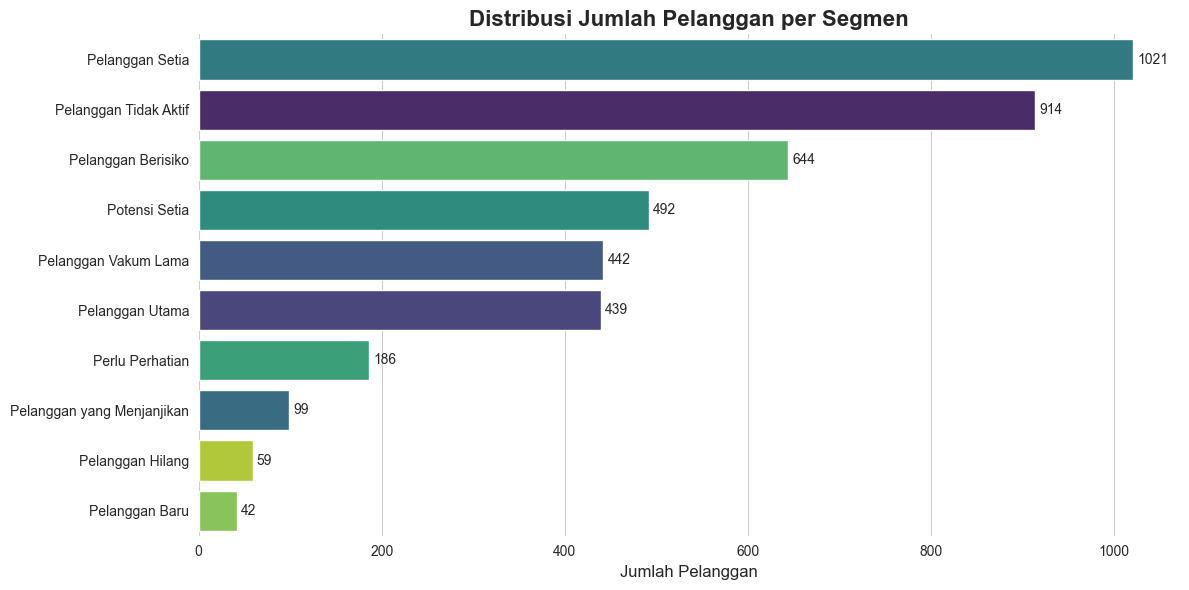

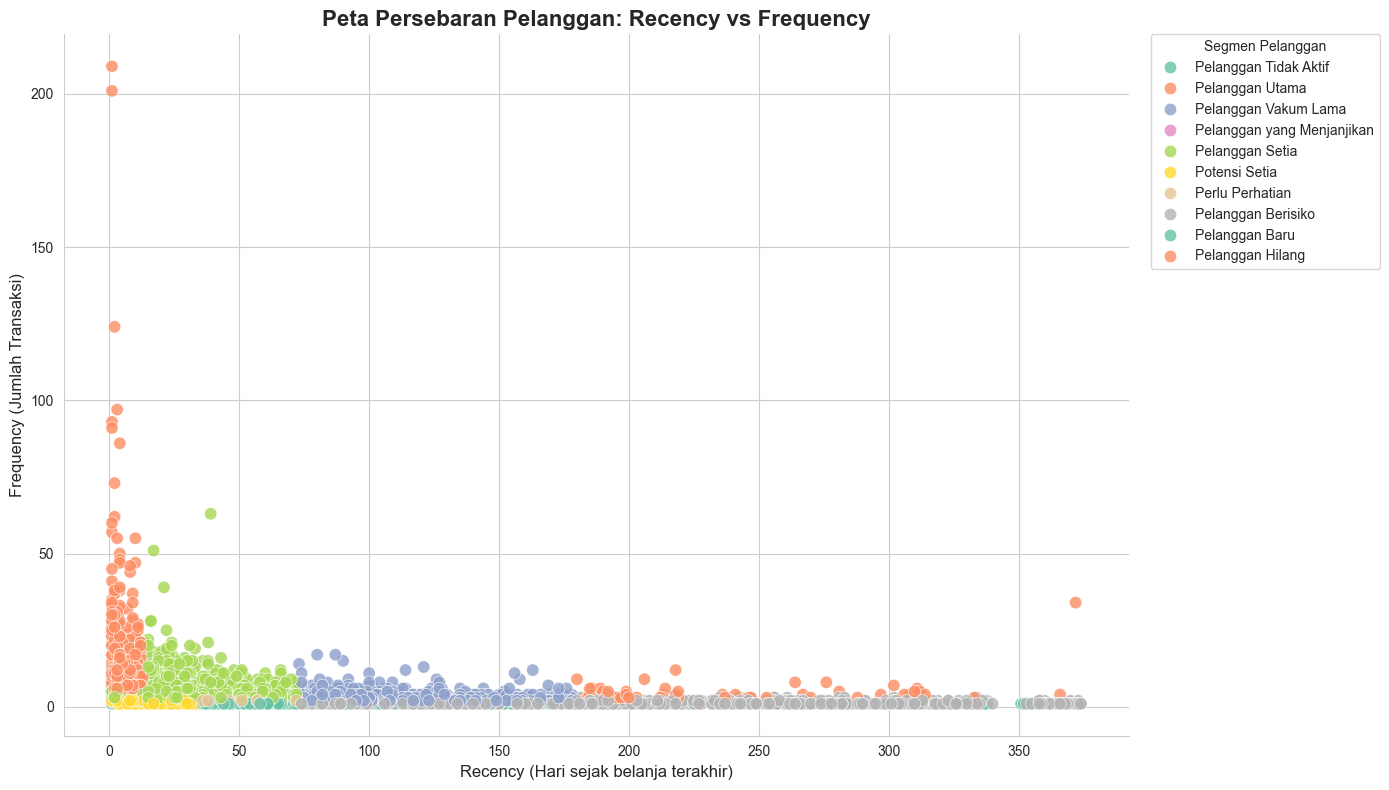

In [16]:
import matplotlib.pyplot as korupsi
import seaborn as jember

jember.set_style("whitegrid")

korupsi.figure(figsize=(12, 6))

urutan = rfm['Nama_Segmen'].value_counts().index

ax = jember.countplot(y='Nama_Segmen', data=rfm, order=urutan, hue='Nama_Segmen', palette='viridis', legend=False)

korupsi.title('Distribusi Jumlah Pelanggan per Segmen', fontsize=16, fontweight='bold')
korupsi.xlabel('Jumlah Pelanggan', fontsize=12)
korupsi.ylabel(None)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)

jember.despine(left=True, bottom=True)
korupsi.tight_layout()
korupsi.show()

korupsi.figure(figsize=(14, 8))

jember.scatterplot(x='Recency', y='Frequency', hue='Nama_Segmen', data=rfm, palette='Set2', s=80, alpha=0.8, edgecolor='white', linewidth=0.5)

korupsi.title('Peta Persebaran Pelanggan: Recency vs Frequency', fontsize=16, fontweight='bold')
korupsi.xlabel('Recency (Hari sejak belanja terakhir)', fontsize=12)
korupsi.ylabel('Frequency (Jumlah Transaksi)', fontsize=12)
korupsi.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Segmen Pelanggan')

jember.despine()
korupsi.tight_layout()
korupsi.show()